# EXPERIMENT 3

## AIM : 

To design a convnet for classifying images using Fashion MNIST dataset

## THEORY AND SOURCE CODE:
A convolutional neural network (CNN or ConvNet) is a network architecture for deep learning that learns directly from data. CNNs are particularly useful for finding patterns in images to recognize objects, classes, and categories. They can also be quite effective for classifying audio, time-series, and signal data.

In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000

Number of test examples:     10000


In [6]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

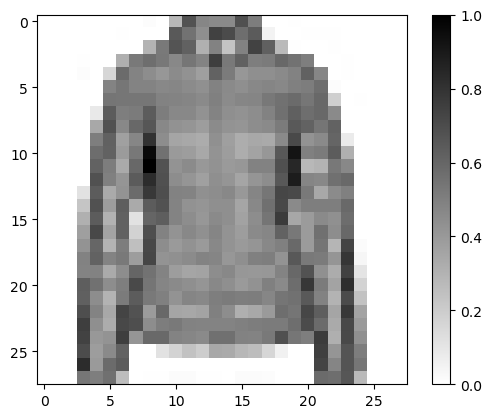

In [7]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(5):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


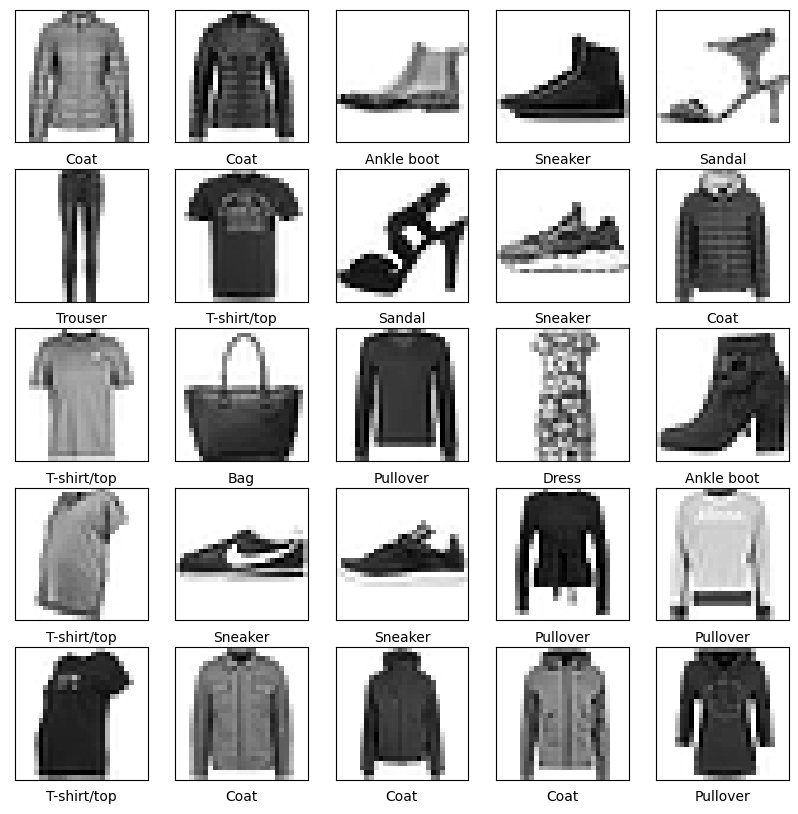

In [8]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [9]:
import tensorflow as tf

# Define ConvNet model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [10]:
model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 28, 28, 32)        320       

                                                                 

 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         

 )                                                               

                                                                 

 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     

                                                                 

 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         

 2D)                                                             

                                                                 

 flatten (Flatten)           (None, 3136)              0         

                                                                 

 dense (Dense)               (None, 128)

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [12]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [13]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10

1875/1875 [==============================] - 19s 4ms/step - loss: 0.3909 - accuracy: 0.8583

Epoch 2/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2527 - accuracy: 0.9075

Epoch 3/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2124 - accuracy: 0.9215

Epoch 4/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1744 - accuracy: 0.9355

Epoch 5/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1482 - accuracy: 0.9458

Epoch 6/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1295 - accuracy: 0.9514

Epoch 7/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1059 - accuracy: 0.9606

Epoch 8/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0872 - accuracy: 0.9675

Epoch 9/10

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0734 - accuracy: 0.9726

Epoch 10/10

1875/1875 [==============================] - 7s 4m

In [14]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3358 - accuracy: 0.9179

Accuracy on test dataset: 0.917900025844574
